In [13]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.special import erf

In [32]:
# Define f(x) = 4 - x^2
if False:
    def f(x):
        return 4 - x**2
    # Define F(x) (antiderivative of f(x))
    def F(x):
        return 4*x - (x**3)/3
    # Limits of integration
    a = -2;
    b =  2;
    N_box = 4;
    
# Define f(x) = sqrt(x)
if False:
    def f(x):
        return np.sqrt(x)
    # Define F(x) (antiderivative of f(x))
    def F(x):
        return 2./3*(x**(3./2))
    # Limits of integration
    a = 0;
    b = 2;
    N_box = 4;
    
# Define f(x) = sin(x)
if False:
    def f(x):
        return np.sin(x)
    # Define F(x) (antiderivative of f(x))
    def F(x):
        return -np.cos(x)
    # Limits of integration
    a = 0;
    b = 3*np.pi;
    N_box = 12;
    
# Define f(x) = e^x
if False:
    def f(x):
        return np.exp(x)
    # Define F(x) (antiderivative of f(x))
    def F(x):
        return np.exp(x)
    # Limits of integration
    a = 0;
    b = 6;
    N_box = 4;
    
# Define f(x) = e^(-x^2)
if True:
    def f(x):
        return np.exp(-x**2)
    # Define F(x) (antiderivative of f(x))
    def F(x):
        return erf(x)*np.sqrt(pi)/2
    # Limits of integration
    a = -3;
    b = 3;
    N_box = 6;

In [33]:
# create the curve
N = 5000;
x = np.linspace(a,b,N);
y = f(x);

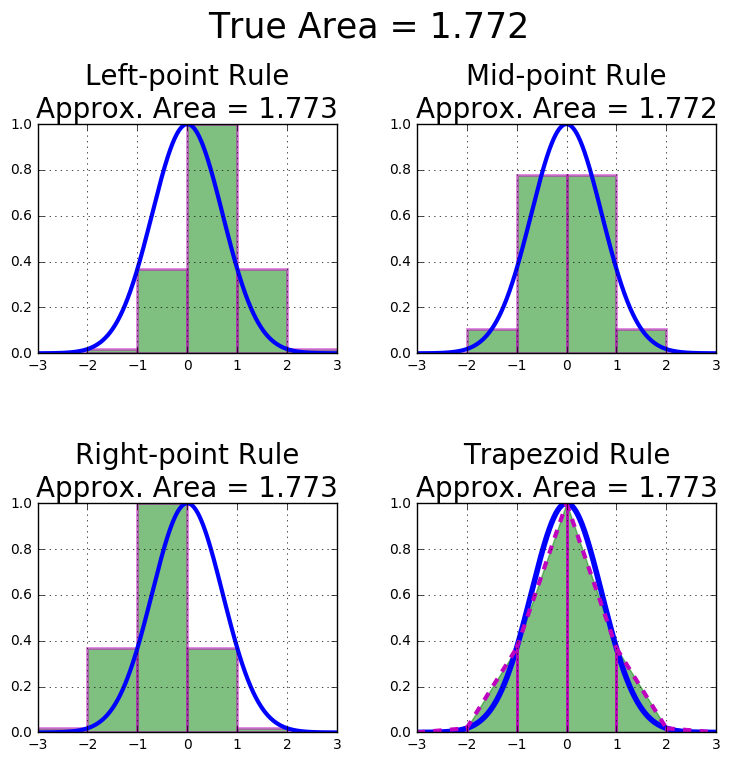

In [34]:
plt.figure(figsize=(8,8))

A_true = F(b) - F(a)

# Plot Left Point
plt.subplot(2,2,1)

plt.plot(x,y, linewidth=3)
plt.xlim((a,b));
plt.ylim((min(y),max(y)));
plt.grid('on');


x_shift = 0
width = (b-a)/N_box;
x_box = np.linspace(a,b-width,N_box)
y_box = f(x_box+width*x_shift)
plt.bar(x_box, y_box, width, color='g', 
        alpha=0.5, edgecolor='m', linewidth=2)
Aleft = width*y_box.sum();
if (abs(Aleft)<1e-10): Aleft = 0

plt.title('\nLeft-point Rule\nApprox. Area = {0:.4g}'.format(Aleft), fontsize=20)

# Plot Mid Point
plt.subplot(2,2,2)

plt.plot(x,y, linewidth=3)
plt.xlim((a,b));
plt.ylim((min(y),max(y)));
plt.grid('on');

x_shift = 0.5; 
width = (b-a)/N_box;
x_box = np.linspace(a,b-width,N_box)
y_box = f(x_box+width*x_shift)
plt.bar(x_box, y_box, width, color='g',
        alpha=0.5, edgecolor='m', linewidth=2)
A = width*y_box.sum();
if (abs(A)<1e-10): A = 0

plt.title('\nMid-point Rule\nApprox. Area = {0:.4g}'.format(A), fontsize=20)
    
# Plot Right Point
plt.subplot(2,2,3)

plt.plot(x,y, linewidth=3)
plt.xlim((a,b));
plt.ylim((min(y),max(y)));
plt.grid('on');

x_shift = 1
width = (b-a)/N_box;
x_box = np.linspace(a,b-width,N_box)
y_box = f(x_box+width*x_shift)
plt.bar(x_box, y_box, width, color='g',
        alpha=0.5, edgecolor='m', linewidth=2)
A = width*y_box.sum();
if (abs(A)<1e-10): A = 0
 
plt.title('\nRight-point Rule\nApprox. Area = {0:.4g}'.format(A), fontsize=20)
    
    
# Trapezoid rule
plt.subplot(2,2,4)

plt.plot(x,y, linewidth=4)
plt.xlim((a,b));
plt.ylim((min(y),max(y)));
plt.grid('on');

xs = np.zeros(2*N_box)
xs[0] = a
xs[-1] = b
A = 0.
for ii in range(1,N_box):
    xs[2*ii-1] = a + ii*width
    xs[2*ii] = a + ii*width
    plt.plot([xs[2*ii], xs[2*ii]],[0,f(xs[2*ii])], 'm', linewidth=2)
    plt.plot([xs[2*ii-2], xs[2*ii]],[f(xs[2*ii-2]),f(xs[2*ii])], '--m', linewidth=3)
    A += 0.5*width*(f(xs[2*ii-2]) + f(xs[2*ii]))
A += 0.5*width*(f(xs[-2]) + f(xs[-1]))
plt.plot([xs[-2], xs[-1]],[f(xs[-2]),f(xs[-1])], '--m', linewidth=3)
if (abs(A)<1e-10): A = 0

plt.fill_between(xs, f(xs), color='g', alpha=0.5)

plt.title('\nTrapezoid Rule\nApprox. Area = {0:.4g}'.format(A), fontsize=20)
    

plt.suptitle('True Area = {0:.4g}\n\n\n'.format(A_true), fontsize=25)
plt.tight_layout(pad=3)